##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE189650**

file previously downloaded:
GSE189650_RAW.tar

unzipped using 
``` bash
tar -xvf GSE189650_RAW.tar
```

This gives the following files:                         
* GSM5705583_UW7_primary_biopsy_barcodes.tsv.gz
* GSM5705583_UW7_primary_biopsy_counts.csv.gz
* GSM5705583_UW7_primary_biopsy_features.tsv.gz
* GSM5705583_UW7_primary_biopsy_matrix.mtx.gz
* GSM5705583_UW7_primary_biopsy_molecule_info.h5
* GSM5705584_UW7_PDX_multiplex_barcodes.tsv.gz
* GSM5705584_UW7_PDX_multiplex_counts.csv.gz
* GSM5705584_UW7_PDX_multiplex_features.tsv.gz
* GSM5705584_UW7_PDX_multiplex_matrix.mtx.gz
* GSM5705584_UW7_PDX_multiplex_molecule_info.h5
* GSM5705585_UW7_recurrent_biopsy_barcodes.tsv.gz
* GSM5705585_UW7_recurrent_biopsy_counts.csv.gz
* GSM5705585_UW7_recurrent_biopsy_features.tsv.gz
* GSM5705585_UW7_recurrent_biopsy_matrix.mtx.gz
* GSM5705585_UW7_recurrent_biopsy_molecule_info.h5

##### renamed files/folders as needed. Two samples (primary and recurrent), just using barcodes/features/matrix files (not counts or h5 file). Not using PDX 

                    


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE189650')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE189650"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
Primary.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE189650/Primary")
Recurrent.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE189650/Recurrent")


In [4]:
head(colnames(Primary.data))
head(colnames(Recurrent.data))

[1] "AAACCCAAGGACTTCT-1" "AAACCCACAACGATTC-1" "AAACCCAGTTTAAGGA-1"
[4] "AAACCCATCAGTGTCA-1" "AAACCCATCGCGAAGA-1" "AAACGAAAGGTTGTTC-1"

[1] "AAACCCACAATACGAA-1" "AAACGCTCATCTCATT-1" "AAAGAACGTGCGTTTA-1"
[4] "AAAGGATAGTCACTGT-1" "AAAGGGCCAAACTAGA-1" "AAAGGGCGTTCAGGTT-1"

In [5]:
#Add dataset info to colnames
colnames(Primary.data) <- paste0("GSE189650_GBM_Primary_", colnames(Primary.data))
colnames(Recurrent.data) <- paste0("GSE189650_GBM_Recurrent_", colnames(Recurrent.data))


In [6]:
head(colnames(Primary.data))
head(colnames(Recurrent.data))

[1] "GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1"
[2] "GSE189650_GBM_Primary_AAACCCACAACGATTC-1"
[3] "GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1"
[4] "GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1"
[5] "GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1"
[6] "GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1"

[1] "GSE189650_GBM_Recurrent_AAACCCACAATACGAA-1"
[2] "GSE189650_GBM_Recurrent_AAACGCTCATCTCATT-1"
[3] "GSE189650_GBM_Recurrent_AAAGAACGTGCGTTTA-1"
[4] "GSE189650_GBM_Recurrent_AAAGGATAGTCACTGT-1"
[5] "GSE189650_GBM_Recurrent_AAAGGGCCAAACTAGA-1"
[6] "GSE189650_GBM_Recurrent_AAAGGGCGTTCAGGTT-1"

In [7]:
#create seperate seurat object for each sample
Primary <- CreateSeuratObject(counts = Primary.data, project = "GSE189650", min.features = 200)
#add metadata to sample
Primary@meta.data$sample_type <- "tumour"
Primary@meta.data$cancer_type <- "GBM"
Primary@meta.data$patient_id <- "Primary"
Primary@meta.data$sample_id <- "GSE189650_GBM_Primary"

In [8]:
#create seperate seurat object for each sample
Recurrent <- CreateSeuratObject(counts = Recurrent.data, project = "GSE189650", min.features = 200)
#add metadata to sample
Recurrent@meta.data$sample_type <- "tumour"
Recurrent@meta.data$cancer_type <- "GBM"
Recurrent@meta.data$patient_id <- "Recurrent"
Recurrent@meta.data$sample_id <- "GSE189650_GBM_Recurrent"

In [9]:
head(Primary@meta.data) 
head(Recurrent@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 GSE189650   3515      1894        
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 GSE189650    989       803        
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 GSE189650   1245       911        
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 GSE189650   7920      3160        
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 GSE189650  11452      4008        
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 GSE189650   4040      1887        
                                         sample_type cancer_type patient_id
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 tumour      GBM         Primary   
                                         sample_id            
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 GSE189650_GBM_Primary

orig.ident nCount_RNA nFeature_RNA
GSE189650_GBM_Recurrent_AAACCCACAATACGAA-1 GSE189650  9257       2860        
GSE189650_GBM_Recurrent_AAACGCTCATCTCATT-1 GSE189650  1974        749        
GSE189650_GBM_Recurrent_AAAGAACGTGCGTTTA-1 GSE189650  3548        916        
GSE189650_GBM_Recurrent_AAAGGGCCAAACTAGA-1 GSE189650  1411        226        
GSE189650_GBM_Recurrent_AAAGGGCGTTCAGGTT-1 GSE189650  3547       1557        
GSE189650_GBM_Recurrent_AAAGGGCGTTTGTGGT-1 GSE189650  4494        215        
                                           sample_type cancer_type patient_id
GSE189650_GBM_Recurrent_AAACCCACAATACGAA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_AAACGCTCATCTCATT-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_AAAGAACGTGCGTTTA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_AAAGGGCCAAACTAGA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_AAAGGGCGTTCAGGTT-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_AAAGGGCGTTTGTGGT-1 tumour      GBM         Recurrent 
                                           sample_id              
GSE189650_GBM_Recurrent_AAACCCACAATACGAA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_AAACGCTCATCTCATT-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_AAAGAACGTGCGTTTA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_AAAGGGCCAAACTAGA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_AAAGGGCGTTCAGGTT-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_AAAGGGCGTTTGTGGT-1 GSE189650_GBM_Recurrent

In [10]:
#Merge seurat objects
GBM <- merge(Primary, y = Recurrent, project = "GSE189650")

In [11]:
GBM
head(GBM@meta.data)
tail(GBM@meta.data)

An object of class Seurat 
33538 features across 5664 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts.1, counts.2

orig.ident nCount_RNA nFeature_RNA
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 GSE189650   3515      1894        
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 GSE189650    989       803        
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 GSE189650   1245       911        
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 GSE189650   7920      3160        
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 GSE189650  11452      4008        
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 GSE189650   4040      1887        
                                         sample_type cancer_type patient_id
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 tumour      GBM         Primary   
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 tumour      GBM         Primary   
                                         sample_id            
GSE189650_GBM_Primary_AAACCCAAGGACTTCT-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCACAACGATTC-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCAGTTTAAGGA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCATCAGTGTCA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACCCATCGCGAAGA-1 GSE189650_GBM_Primary
GSE189650_GBM_Primary_AAACGAAAGGTTGTTC-1 GSE189650_GBM_Primary

orig.ident nCount_RNA nFeature_RNA
GSE189650_GBM_Recurrent_TTTAGTCGTGTGCTTA-1 GSE189650   792        604        
GSE189650_GBM_Recurrent_TTTCACACAACCAATC-1 GSE189650  1652        604        
GSE189650_GBM_Recurrent_TTTCATGTCCATCTGC-1 GSE189650  2752       1231        
GSE189650_GBM_Recurrent_TTTCGATAGAGGTTTA-1 GSE189650  5412       2132        
GSE189650_GBM_Recurrent_TTTGACTTCGCTCTCA-1 GSE189650  6692       2217        
GSE189650_GBM_Recurrent_TTTGGAGTCTAAGAAG-1 GSE189650  1041        252        
                                           sample_type cancer_type patient_id
GSE189650_GBM_Recurrent_TTTAGTCGTGTGCTTA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_TTTCACACAACCAATC-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_TTTCATGTCCATCTGC-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_TTTCGATAGAGGTTTA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_TTTGACTTCGCTCTCA-1 tumour      GBM         Recurrent 
GSE189650_GBM_Recurrent_TTTGGAGTCTAAGAAG-1 tumour      GBM         Recurrent 
                                           sample_id              
GSE189650_GBM_Recurrent_TTTAGTCGTGTGCTTA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_TTTCACACAACCAATC-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_TTTCATGTCCATCTGC-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_TTTCGATAGAGGTTTA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_TTTGACTTCGCTCTCA-1 GSE189650_GBM_Recurrent
GSE189650_GBM_Recurrent_TTTGGAGTCTAAGAAG-1 GSE189650_GBM_Recurrent

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


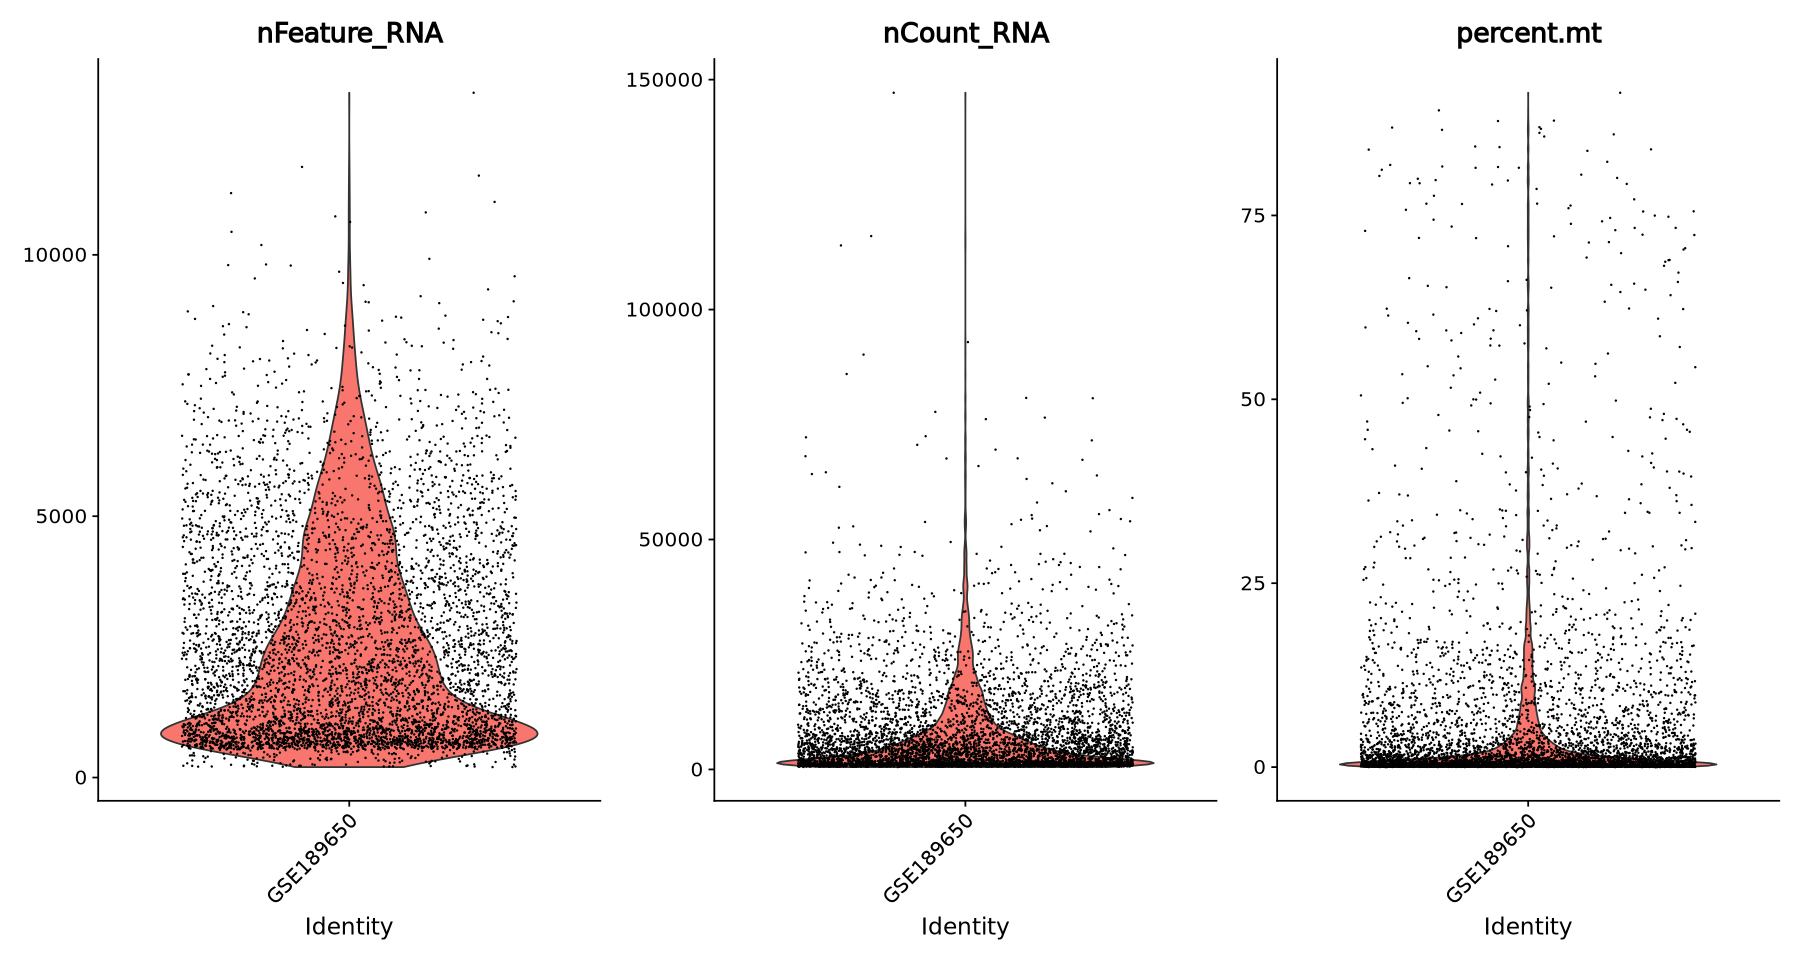

In [12]:
#QC Steps 
GBM[["percent.mt"]] <- PercentageFeatureSet(GBM, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(GBM, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [14]:
#Normalise the data
GBM <- NormalizeData(GBM)
#Find variable features
GBM <- FindVariableFeatures(GBM, selection.method = "vst", nfeatures = 2000)
#Scale the data
GBM <- ScaleData(GBM, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
GBM <- RunPCA(GBM, features = VariableFeatures(object = GBM))

Normalizing layer: counts.1

Normalizing layer: counts.2

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  GALNT17, RBFOX3, ATP8A2, DLGAP2, MYT1L, RIMBP2, GABBR2, GABRG3, CACNA1B, GRIN2B 
	   GRIN2A, PPP2R2C, OPCML, SRRM4, LRFN5, CACNA1C, SHANK2, GRM5, RYR2, SYN2 
	   RIMS2, CACNA2D3, FRMPD4, GABRB2, ARHGAP44, LRRC7, SLC35F3, TENM2, GABRB3, TMEM132D 
Negative:  EGFR, PTPRZ1, NEAT1, GLIS3, RFX4, UTRN, NHSL1, AKAP13, TNC, ARHGAP31 
	   GFAP, CD44, DPYSL3, IQGAP2, AF279873.3, NAMPT, FAM129A, AC092957.1, DTNA, LRMDA 
	   PALLD, VCAN, STK33, ALDH1L1, NKAIN3, SOX6, PARD3B, PBX3, RBPMS, GRAMD2B 
PC_ 2 
Positive:  GPM6A, RORA, EGFR, DCLK2, PTPRZ1, NRCAM, NRXN1, FMN2, RFX4, CTNNA2 
	   SOX5, PTPRG, NKAIN3, DPP6, PTCHD1-AS, LRP1B, SOX6, MIR99AHG, KIAA1211, PARD3 
	   CHL1, DTNA, THSD7A, DGKG, PALLD, ADGRV1, SLC1A2, DGKB, ALDH1L1, AC092691.1 
Negative:  DOCK2, ACS

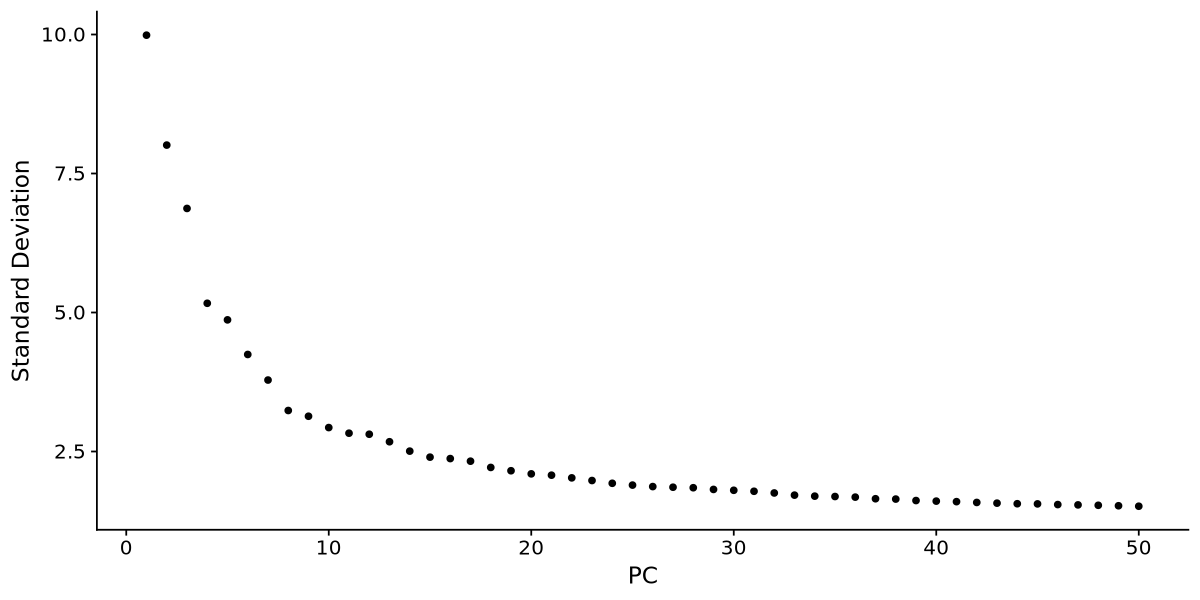

In [15]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(GBM, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [16]:
#Find neighbours (make sure number matches no. features chosen above)
GBM <- FindNeighbors(GBM, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [17]:
#Run UMAP
GBM <- RunUMAP(GBM, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:08:37 UMAP embedding parameters a = 0.9922 b = 1.112

10:08:37 Read 5664 rows and found 40 numeric columns

10:08:37 Using Annoy for neighbor search, n_neighbors = 30

10:08:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:08:38 Writing NN index file to temp file /scratch/temp/9432344/Rtmp7TmGK2/file2f4c1734db5244

10:08:38 Searching Annoy index using 1 thread, search_k = 3000

10:08:39 Annoy recall = 100%

10:08:39 Commencing smooth kNN distance calibration using 1 thread
 with t

In [18]:
#Cluster, resolution here set to 0.2
GBM <- FindClusters(GBM, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5664
Number of edges: 210024

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9424
Number of communities: 12
Elapsed time: 0 seconds


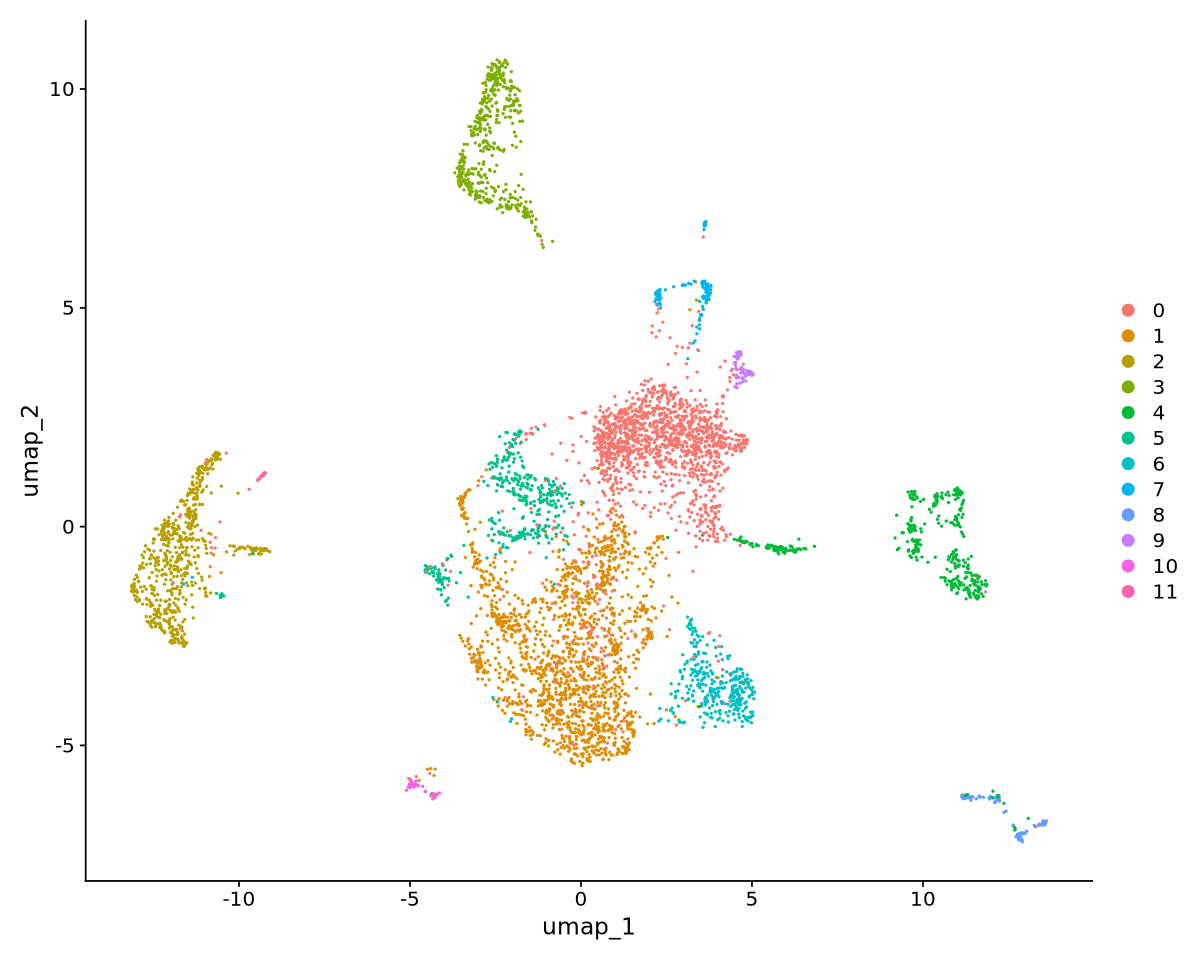

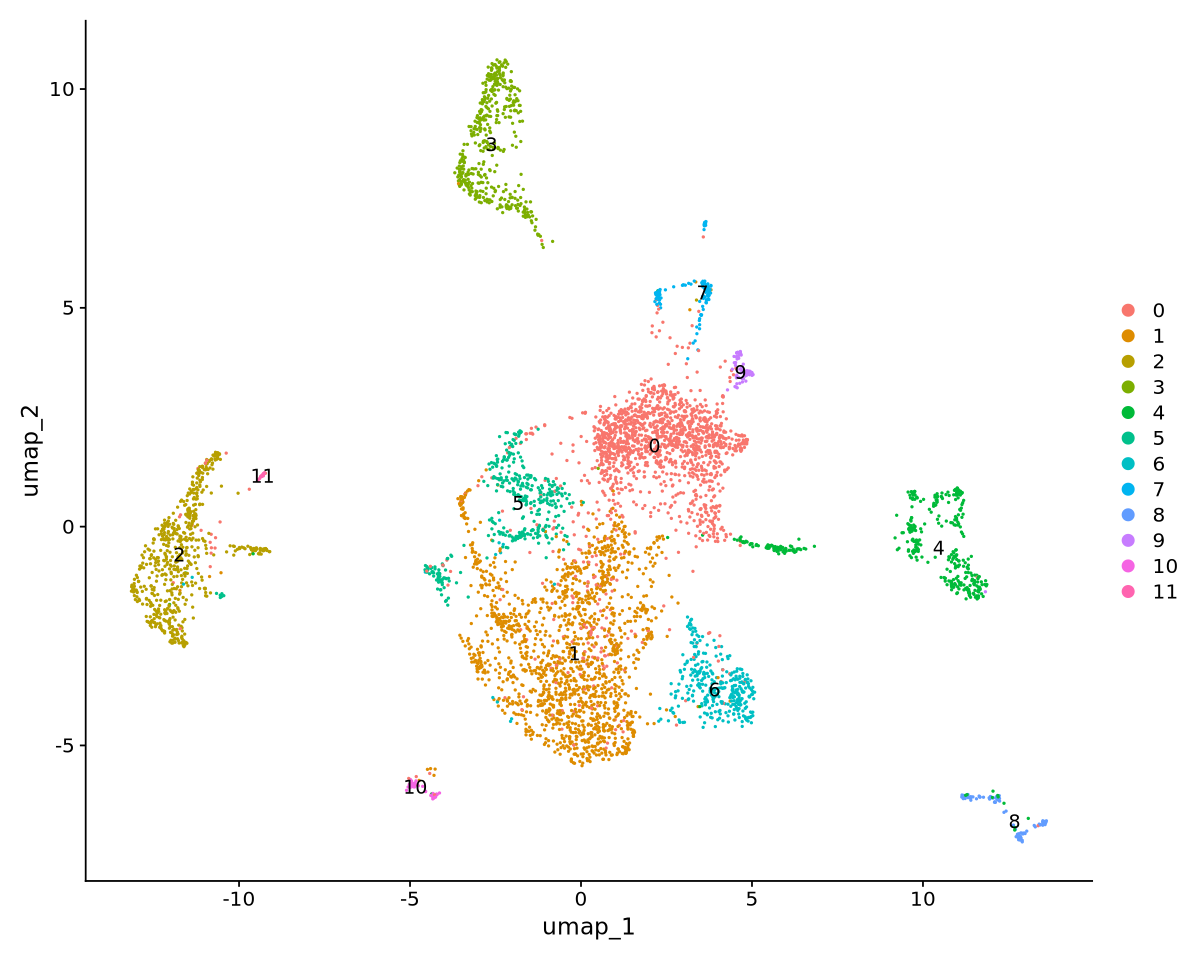

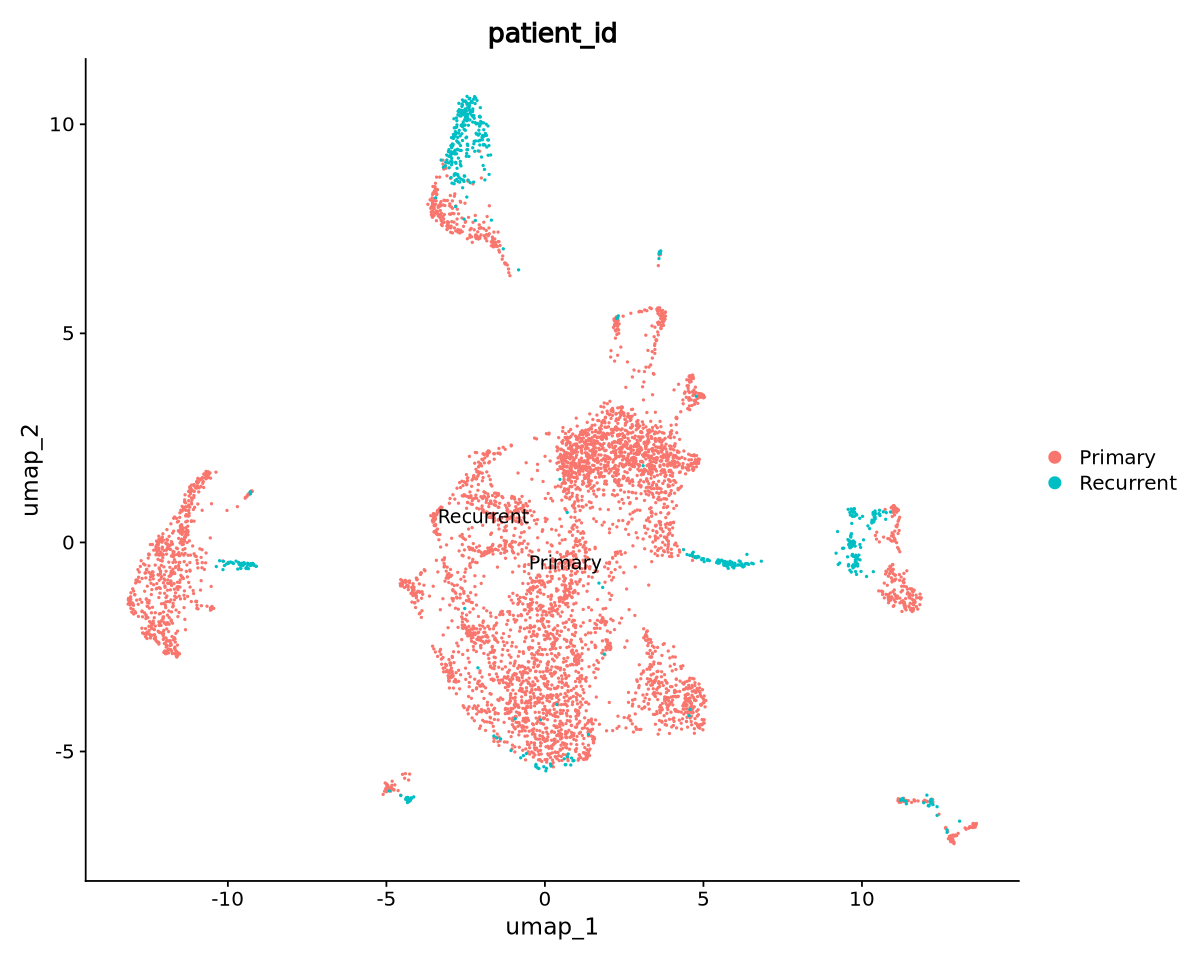

In [19]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(GBM, reduction = "umap")
DimPlot(GBM, reduction = "umap", label=TRUE)
DimPlot(GBM, reduction = "umap", label=TRUE, group = "patient_id")

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(GBM, file = "/scratch/user/s4436039/scdata/GSE189650/GSE189650.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Warning message:
“All cells have the same value (0) of “CD1C””


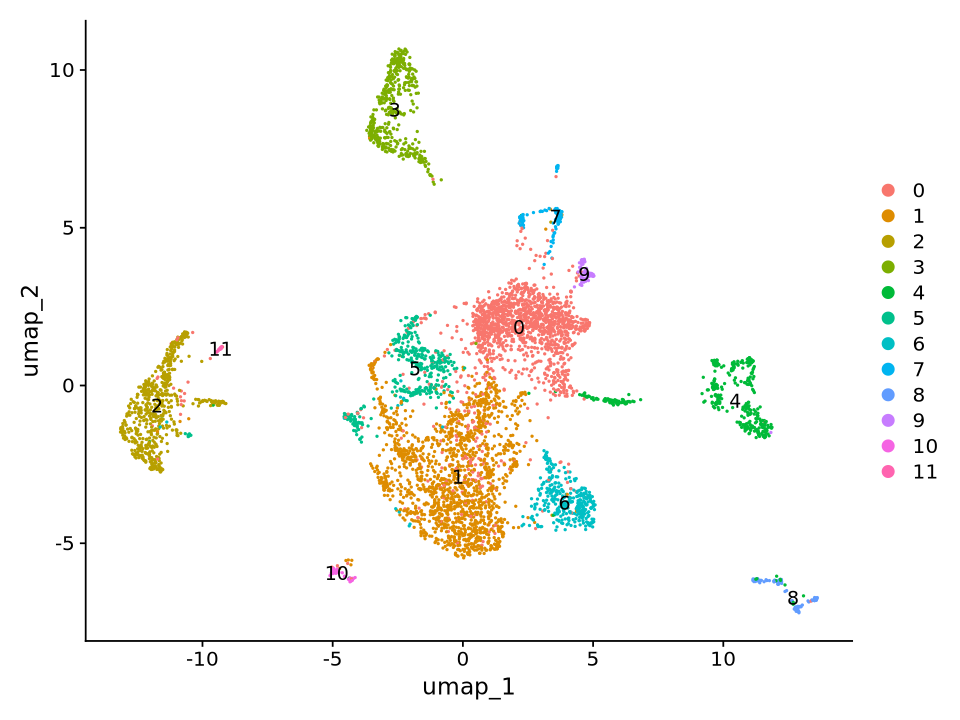

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of CD1C.”


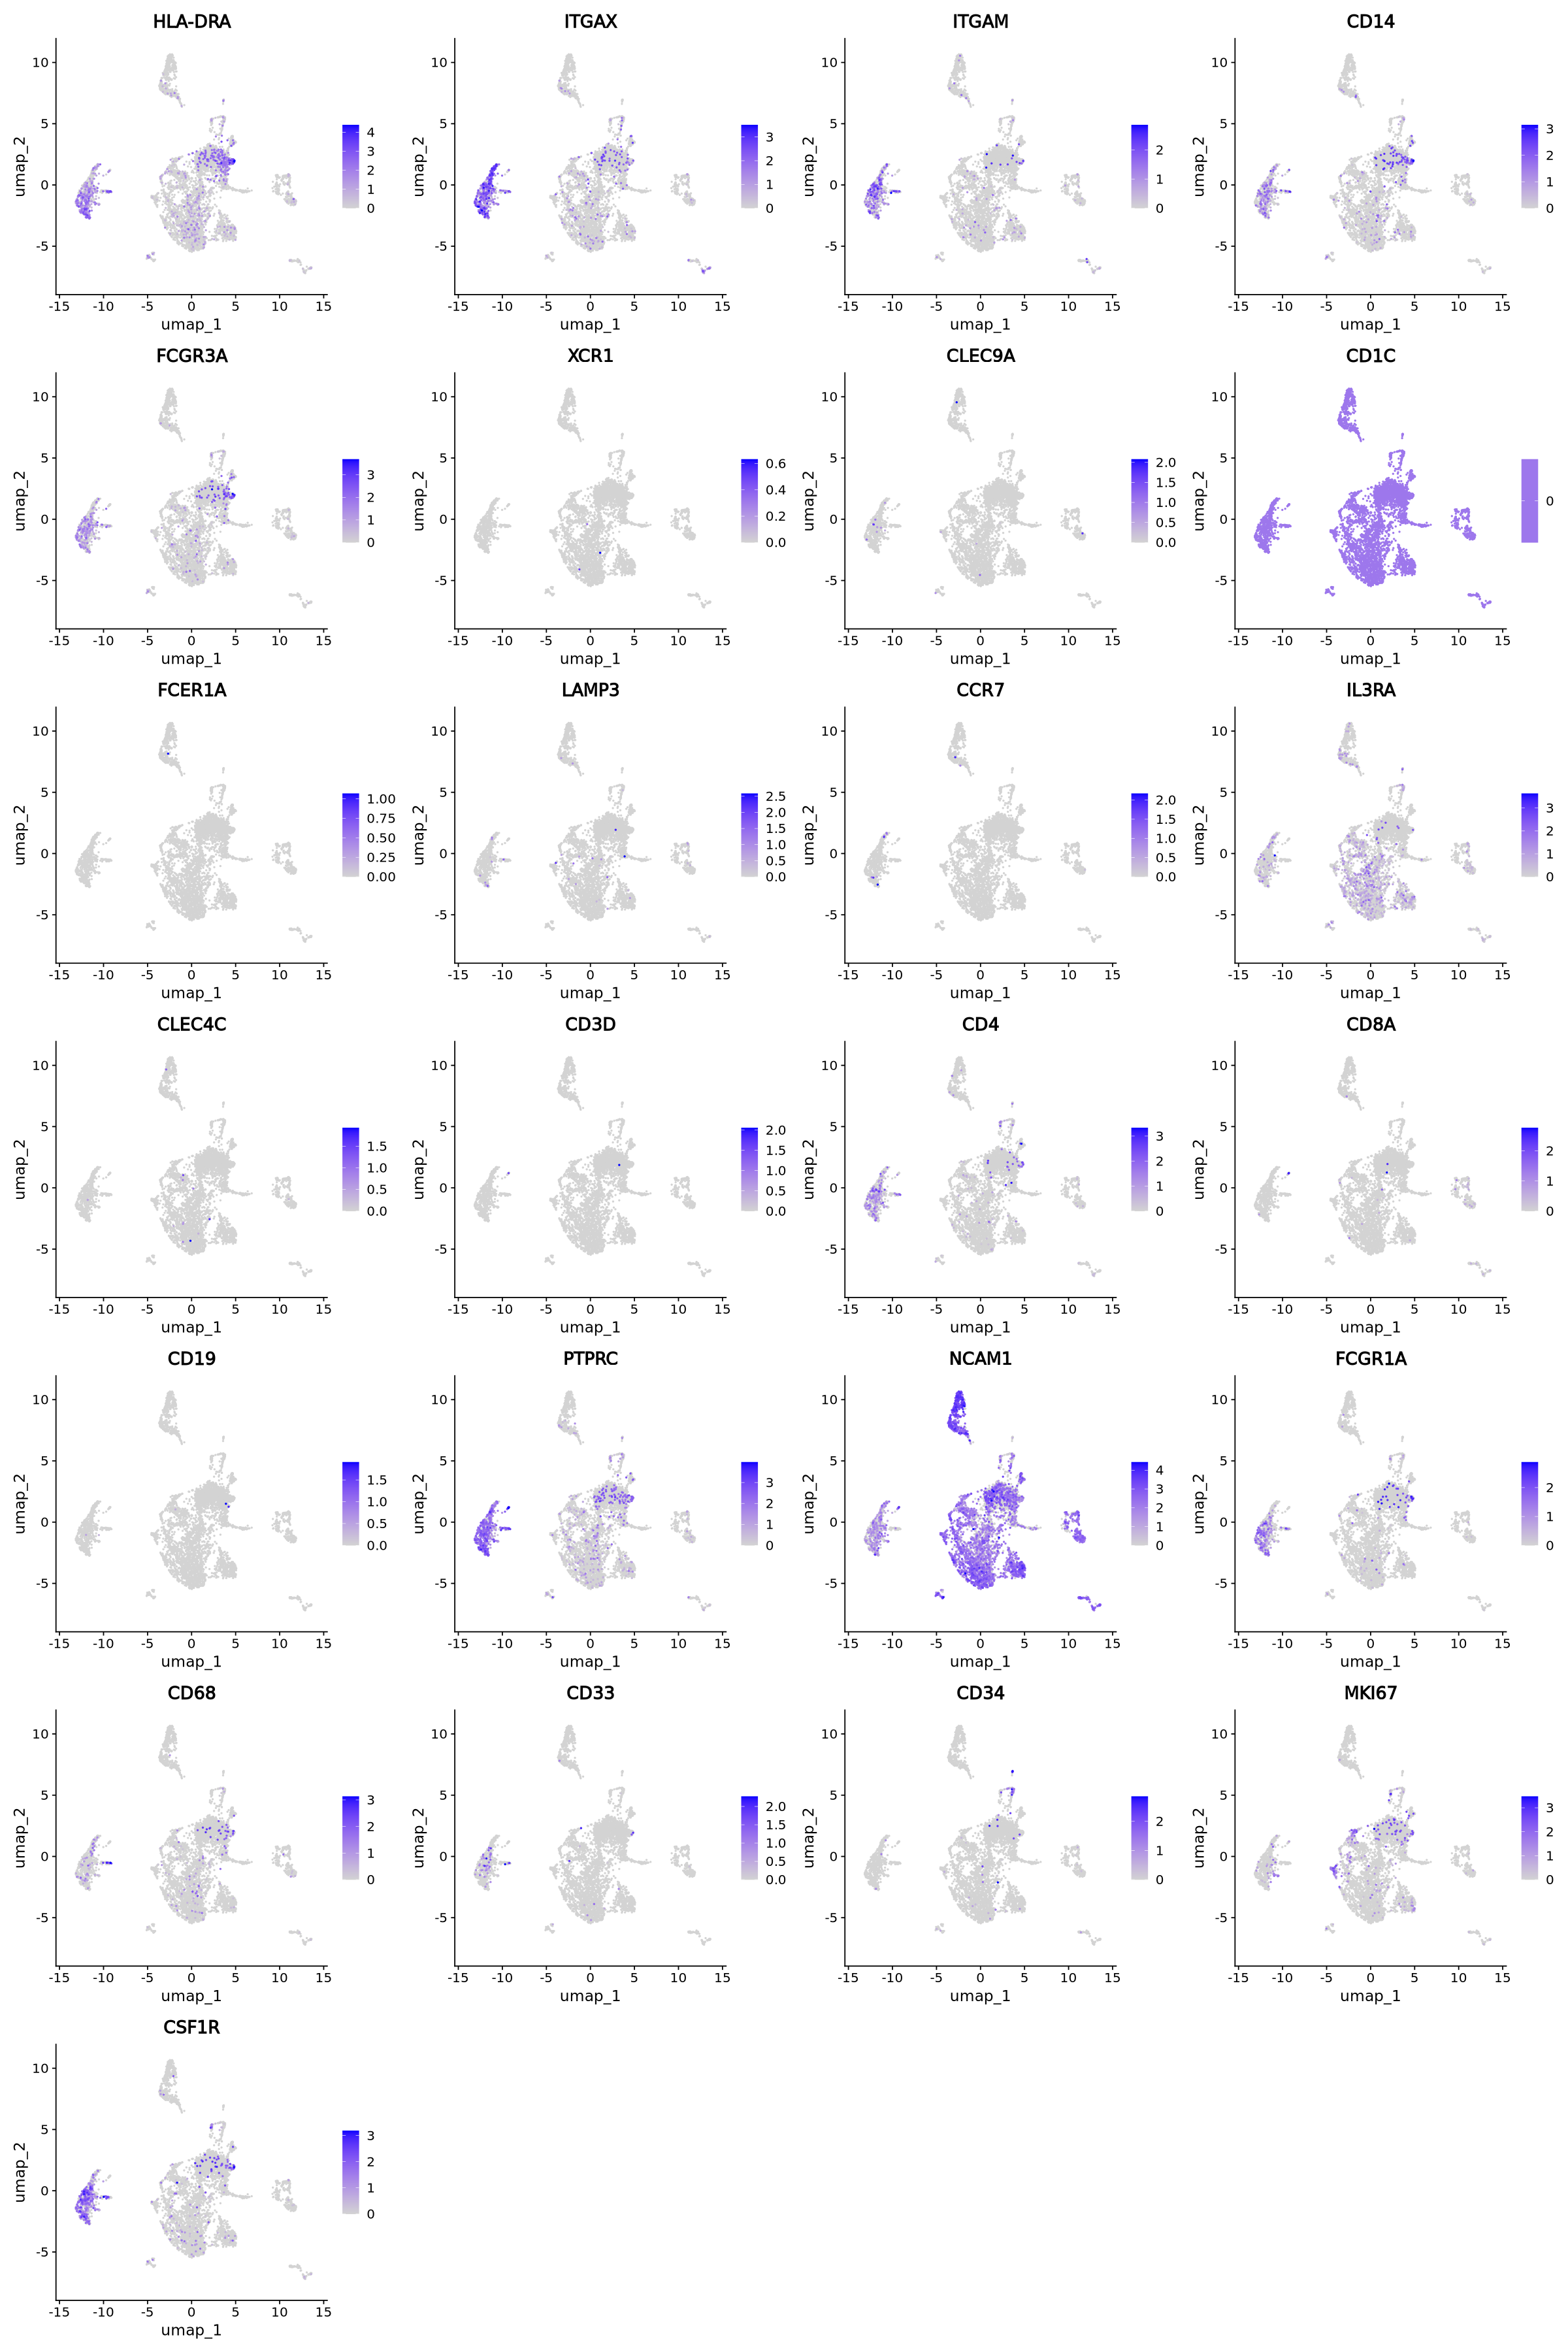

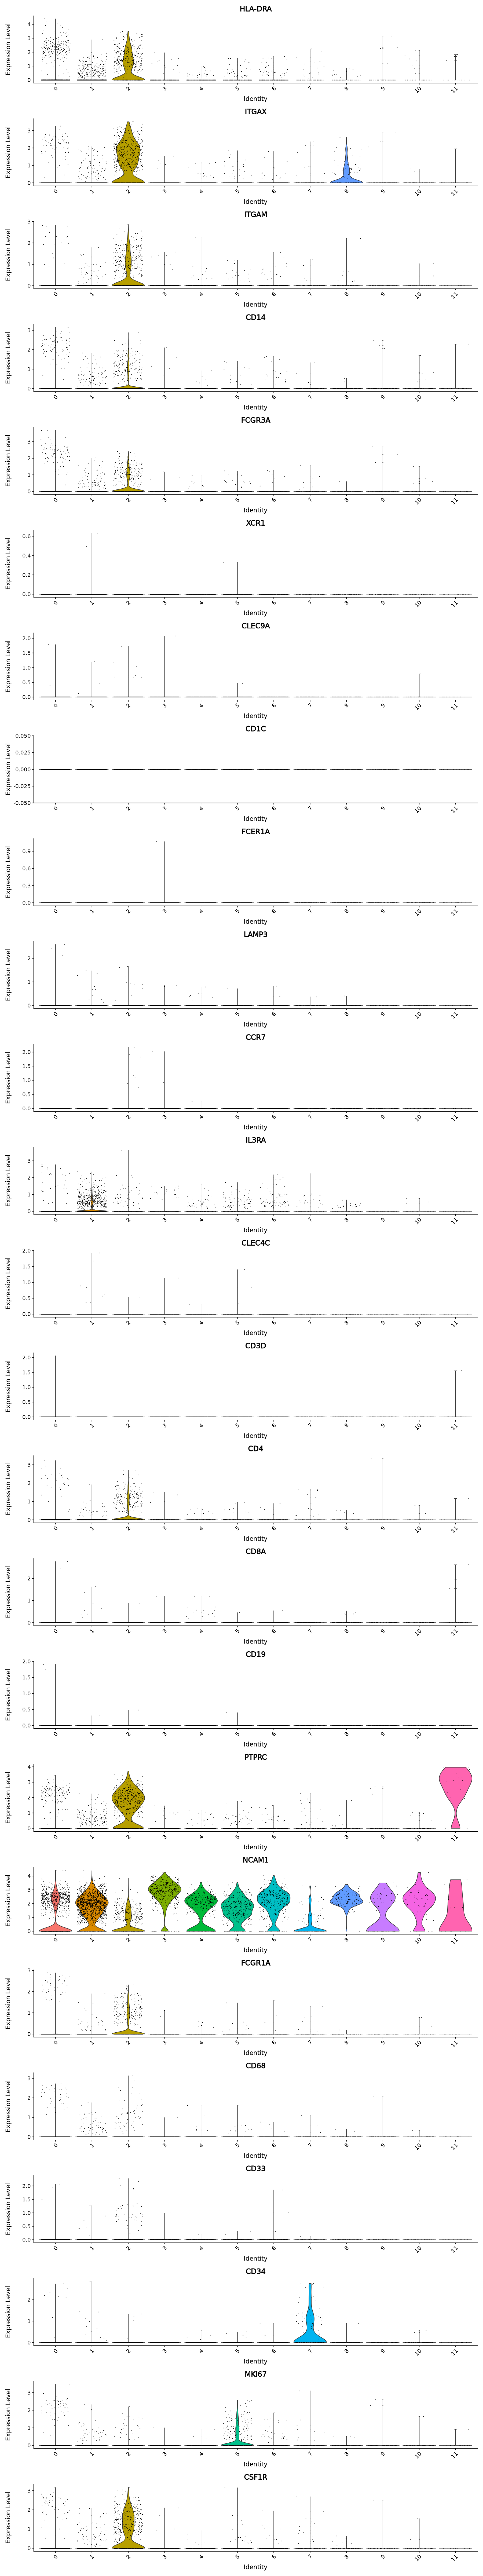

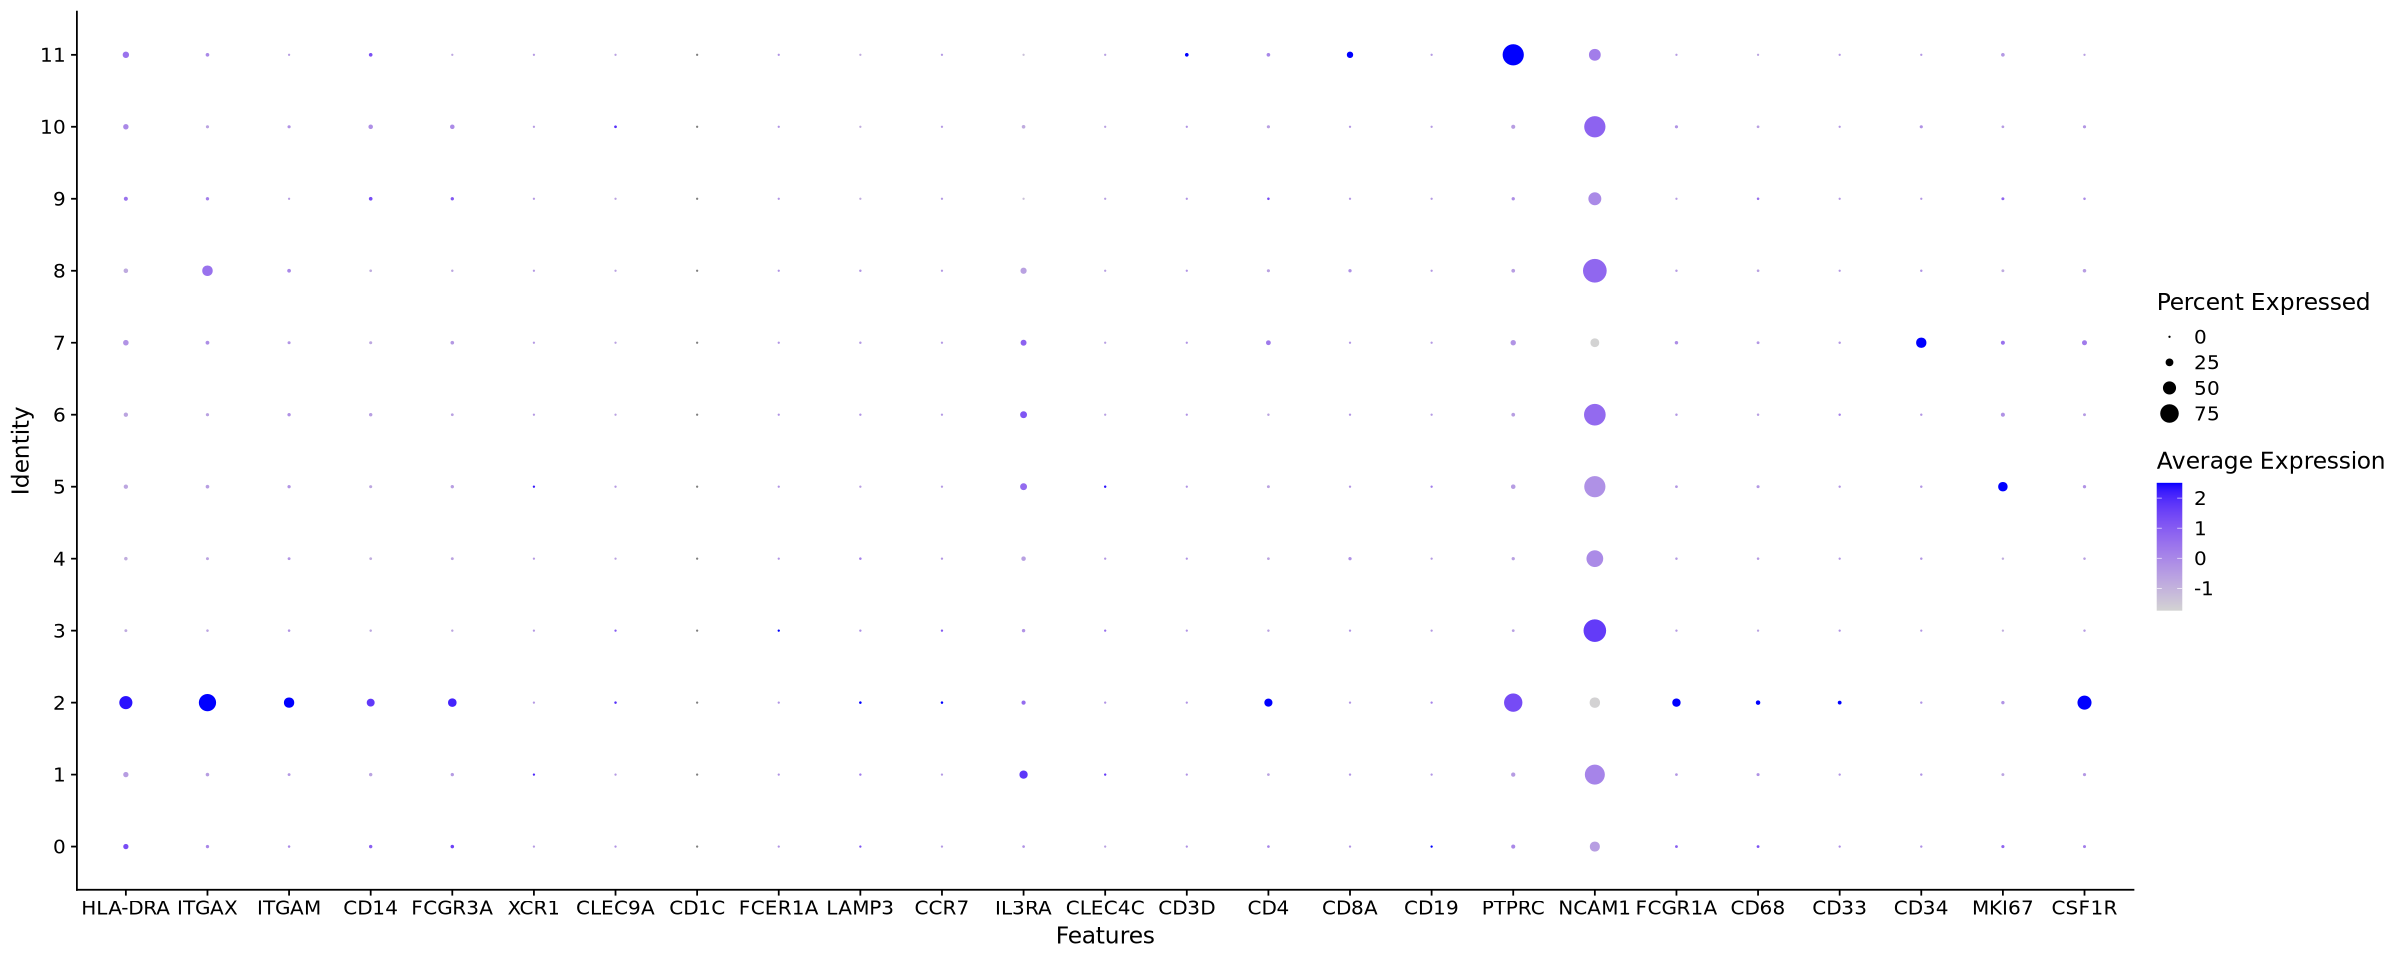

In [21]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(GBM, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster ____ is the myeloid cells, now subsetting out this clusters

In [34]:
head(GBM@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025  1363        833        
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025  1629        916        
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025  1467        907        
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025  1003        614        
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025  2210       1229        
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025  1646        952        
                                          sample_type cancer_type patient_id
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC tumour      NPC         pt-1802   
                                          sample_id          percent.mt
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025_NPC_1802 12.839325 
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025_NPC_1802 13.075506 
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025_NPC_1802  7.907294 
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025_NPC_1802  2.193420 
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025_NPC_1802  8.914027 
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025_NPC_1802  7.472661 
                                          RNA_snn_res.0.2 seurat_clusters
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA 0               0              
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA 0               0              
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG 2               2              
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG 3               3              
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT 2               2              
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC 2               2              
                                          RNA_snn_res.0.4
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA 1              
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA 1              
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG 0              
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG 5              
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT 9              
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC 9

In [35]:
myeloid_GBM <- subset(GBM, subset = RNA_snn_res.0.2 %in% c("8"))

In [36]:
GBM
myeloid_GBM

An object of class Seurat 
20930 features across 82622 samples within 1 assay 
Active assay: RNA (20930 features, 2000 variable features)
 21 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
20930 features across 2255 samples within 1 assay 
Active assay: RNA (20930 features, 2000 variable features)
 21 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, scale.data
 2 dimensional reductions calculated: pca, umap

In [37]:
saveRDS(myeloid_GBM, "/scratch/user/s4436039/scdata/GSE189650/GSE189650_myeloid.RDS")

#### Following the above then need to move entire GSE189650 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE189650/ /QRISdata/Q5935/nikita/scdata/GSE189650
```